<h1> Final Capstone Project - Setting up a restaurant in Mexico City </h1>

<b> First, import all libraries </b>

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!pip install folium==0.5.0
import folium # plotting library

from sklearn.cluster import KMeans

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


<b> Now, set up all details necessary for Foursquare API requests</b>

In [2]:
# get the coordinates of Mexico City
address = 'Mexico City'

geolocator = Nominatim(user_agent='facebook')
location = geolocator.geocode(address)
mxlatitude = location.latitude
mxlongitude = location.longitude

print(f"{address}'s latitude is {mxlatitude} and its longitude is {mxlongitude}")

Mexico City's latitude is 19.4326296 and its longitude is -99.1331785


In [3]:
# Foursquare Credentials:
CLIENT_ID = 'CPSB0EYFM1APBVOPNMF4AQS2EFJKJF2SGMY4DFXYW0JUWZXT' # your Foursquare ID
CLIENT_SECRET = '0W2FGKTJ34UAP0U4NIIHGQEDR1S4MEXW2I5TYDHGMNZSMQJ3' # your Foursquare Secret
ACCESS_TOKEN = 'GSR1CEMEVSZOFFJ5FMETA2A1GKDKVYFXP54SBKRHMVBE3MAE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50 #50 is now the maximum
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CPSB0EYFM1APBVOPNMF4AQS2EFJKJF2SGMY4DFXYW0JUWZXT
CLIENT_SECRET:0W2FGKTJ34UAP0U4NIIHGQEDR1S4MEXW2I5TYDHGMNZSMQJ3


In [4]:
# Foursquare Search Details. Change as appropriate
search_query = 'restaurant'
radius = 10000
latitude = 0
longitude = 0

In [5]:
# setup the URL for Foursquare requests:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

<b> Scrape data on Mexico City's boroughs from Wikipedia, and get coordinates from Geolocator</b>

In [6]:
# Get names of Mexico City's boroughs from Wikipedia
wikiURL = 'https://en.wikipedia.org/wiki/Boroughs_of_Mexico_City'
wikiPageDataFrames = pd.read_html(wikiURL)

In [7]:
len(wikiPageDataFrames)

5

In [8]:
# Isolate relevant table, drop extra header row, remove generic "Mexico City" & "Mexico" rows
mexico_City_boroughs = wikiPageDataFrames[0]
mexico_City_boroughs.columns = mexico_City_boroughs.columns.droplevel(0)
mexico_City_boroughs.drop(mexico_City_boroughs.loc[mexico_City_boroughs['Name']=='Mexico City'].index, inplace = True)
mexico_City_boroughs.drop(mexico_City_boroughs.loc[mexico_City_boroughs['Name']=='Mexico'].index, inplace = True)

In [9]:
mexico_City_boroughs.head()

,Name,Population(2020)[2],Population(2010)[6],Change,km2,sq mi,Population density(2020),Incorporation date[5],Mayor
0,Álvaro Obregón[a],759137,727034,+4.4%,95.9,37.0,"2 (20,502.1/sq mi)","February 15, 1826",Layda Sansores
1,Azcapotzalco,432205,414711,+4.2%,33.5,12.9,"2 (33,415.1/sq mi)","August 6, 1826",Vidal Llerenas
2,Benito Juárez,434153,385439,+12.6%,26.7,10.3,"2 (42,114.3/sq mi)","December 29, 1970",Santiago Taboada
3,Coyoacán,614447,620416,−1.0%,53.9,20.8,"2 (29,525.2/sq mi)","August 6, 1824",Manuel Negrete
4,Cuajimalpa,217686,186391,+16.8%,71.2,27.5,"2 (7,918.6/sq mi)","July 28, 1899",Adrián Ruvalcaba


In [10]:
# Pull Lat/Lng data of Mexico City boroughs from Geolocator
mxlat = []
mxlng = []

for address in mexico_City_boroughs['Name']:
    geolocator = Nominatim(user_agent='facebook')
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(f"{address}'s latitude is {latitude} and its longitude is {longitude}")
    mxlat.append(latitude)
    mxlng.append(longitude)

Álvaro Obregón[a]'s latitude is 19.8168516 and its longitude is -101.0114388
Azcapotzalco's latitude is 19.4837824 and its longitude is -99.1844166
Benito Juárez's latitude is 20.8169666 and its longitude is -98.17826806649418
Coyoacán's latitude is 19.3500942 and its longitude is -99.1623319
Cuajimalpa's latitude is 19.3570477 and its longitude is -99.3006776
Cuauhtémoc's latitude is 22.460514 and its longitude is -102.35347648077007
Gustavo A. Madero[b]'s latitude is 19.4838614 and its longitude is -99.1134723
Iztacalco[c]'s latitude is 19.3962535 and its longitude is -99.0965875
Iztapalapa's latitude is 19.3591195 and its longitude is -99.0929294
La Magdalena Contreras's latitude is 19.3049539 and its longitude is -99.241301
Miguel Hidalgo's latitude is 19.4075059 and its longitude is -99.1917103
Milpa Alta's latitude is 19.1919839 and its longitude is -99.0228937
Tláhuac[d]'s latitude is 19.2703721 and its longitude is -99.0049033
Tlalpan[e]'s latitude is 19.2884203 and its longitu

In [11]:
# Append lat/lng data to dataframe
mexico_City_boroughs['Latitude'] = mxlat
mexico_City_boroughs['Longitude'] = mxlng

<b> Get lists of restaurants from Foursquare </b>

In [12]:
# Get list of JSON results from Foursquare for all boroughs in Mexico City
restaurantlists = []
for name, lat, lng in zip(mexico_City_boroughs['Name'], mexico_City_boroughs['Latitude'],mexico_City_boroughs['Longitude']):
    latitude = lat
    longitude = lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    restaurantlists.append(results)

In [13]:
# Concatanate results for all boroughs to one dataframe 
appended_data = []

for i, e in enumerate(restaurantlists):
    mc_borough_restaurants_temp = restaurantlists[i]['response']['venues']
    mc_restaurant_dataframe = pd.json_normalize(mc_borough_restaurants_temp)
    appended_data.append(mc_restaurant_dataframe)
    
mc_borough_restaurants = pd.concat(appended_data)


In [14]:
mc_borough_restaurants.shape

(657, 19)

In [67]:
# Remove Duplicates
mc_borough_restaurants.drop_duplicates(subset=['name'], inplace = True)

In [16]:
mc_borough_restaurants.shape

(354, 19)

In [17]:
# Define a function to extract the restaurant category from the dataframe
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
# Clean Categories
mc_borough_restaurants['categories'] = mc_borough_restaurants.apply(get_category_type, axis=1)
mc_borough_restaurants.head()

# Filter columns
filtered_columns = ['name', 'categories'] + [col for col in mc_borough_restaurants.columns if col.startswith('location.')] + ['id']
mc_borough_restaurants_filtered = mc_borough_restaurants.loc[:, filtered_columns]

# Clean columns
mc_borough_restaurants_filtered.columns = [col.split('.')[-1] for col in mc_borough_restaurants_filtered.columns]

mc_borough_restaurants_filtered.head(10)

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,crossStreet,neighborhood,id
0,restaurante bar Titanic,Seafood Restaurant,Carretera Morelia-Zinapecuaro Km 53+800,19.802437,-101.069168,"[{'label': 'display', 'lat': 19.8024372660595,...",6255,MX,México,[Carretera Morelia-Zinapecuaro Km 53+800],NaN,NaN,NaN,NaN,NaN,4cf6bf9e0a71224b9eb31f93
1,"Restaurant ""La Chilaca""",BBQ Joint,Av. 18 De Marzo,19.809164,-100.892395,"[{'label': 'display', 'lat': 19.80916404724121...",12496,MX,México,"[Av. 18 De Marzo, 58980 Querendaro, Michoacán ...",58980,Queréndaro,Michoacán de Ocampo,NaN,NaN,53261def498e9f92381573ff
2,"Restaurante ""El Jacal""",Restaurant,NaN,19.754940,-101.042493,"[{'label': 'display', 'lat': 19.75494034272592...",7620,MX,México,NaN,NaN,NaN,NaN,NaN,NaN,4fd28a74e4b07b0661d8e70b
3,El Brujo Restaurante,Seafood Restaurant,NaN,19.836896,-101.101436,"[{'label': 'display', 'lat': 19.836896, 'lng':...",9685,MX,México,"[58890 Tájaro de los Izquierdo, Michoacán de O...",58890,Tájaro de los Izquierdo,Michoacán de Ocampo,NaN,NaN,5a5bc35cf79faa3e109fbb2e
0,Cabanna Restaurant,Seafood Restaurant,"Av. Presidente Masaryk 134, Polanco",19.431445,-99.186963,"[{'label': 'display', 'lat': 19.43144537375281...",5832,MX,México,"[Av. Presidente Masaryk 134, Polanco (Lope de ...",11560,Miguel Hidalgo,Distrito Federal,Lope de Vega,NaN,537a6342498e0a7a91b05f17
1,Restaurant Alberto's,Mexican Restaurant,Av. Tepantongo,19.495096,-99.185316,"[{'label': 'display', 'lat': 19.49509597689317...",1262,MX,México,"[Av. Tepantongo (Pozo Pedregal), 02200 Azcapot...",02200,Azcapotzalco,Distrito Federal,Pozo Pedregal,NaN,4be840da947820a151aab4db
2,Restaurant y Cafetería del Rhin,Mexican Restaurant,Rio Rhin No. 49,19.431500,-99.165116,"[{'label': 'display', 'lat': 19.43150025777036...",6162,MX,México,"[Rio Rhin No. 49, Ciudad de México, Distrito F...",NaN,Ciudad de México,Distrito Federal,NaN,NaN,4dc0273a93a0b5a1562559d1
3,Restaurant California (Suc. Sor Juana),Restaurant,Sor Juana Inés de la Cruz,19.491989,-99.189465,"[{'label': 'display', 'lat': 19.491989, 'lng':...",1056,MX,México,"[Sor Juana Inés de la Cruz, Tlanepantla, Morelos]",NaN,Tlalnepantla,Morelos,NaN,NaN,4bf3fb796a31d13ac62f952e
4,restaurant tamaulipeco,Mexican Restaurant,NaN,19.479555,-99.199989,"[{'label': 'display', 'lat': 19.47955503010384...",1700,MX,México,NaN,NaN,NaN,NaN,NaN,NaN,5061de84498ee603149cfd71
5,Restaurant Árabe Miguel,Restaurant,Cordoba 226,19.412743,-99.157052,"[{'label': 'display', 'lat': 19.41274283487654...",8413,MX,México,"[Cordoba 226 (Roma), 06700 Cuauhtémoc, Distrit...",06700,Cuauhtemoc,Distrito Federal,Roma,Roma Norte,4bdc88a7c79cc928f2ff86e9


<b> Map all restaurants using Folium </b>

In [19]:
map_Mexico_City = folium.Map(location=[mxlatitude, mxlongitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(
    mc_borough_restaurants_filtered['lat'], 
    mc_borough_restaurants_filtered['lng'], 
    mc_borough_restaurants_filtered['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Mexico_City)  
    
map_Mexico_City

In [20]:
# Count the number of restaurants of each type. Notice that they are almost all "Mexican Restaurants" or generic restaurants
restaurant_types = mc_borough_restaurants_filtered.groupby('categories').size().reset_index(name='Counts')
restaurant_types.sort_values(by=['Counts'], ascending=False).head(10)

,categories,Counts
29,Mexican Restaurant,115
35,Restaurant,104
37,Seafood Restaurant,12
13,Chinese Restaurant,10
5,Bar,9
1,American Restaurant,7
2,Argentinian Restaurant,6
17,Diner,5
28,Latin American Restaurant,5
40,Steakhouse,4


<b> Use KElbowVisualizer to find optimum K-value for clustering, then apply KMeans </b>

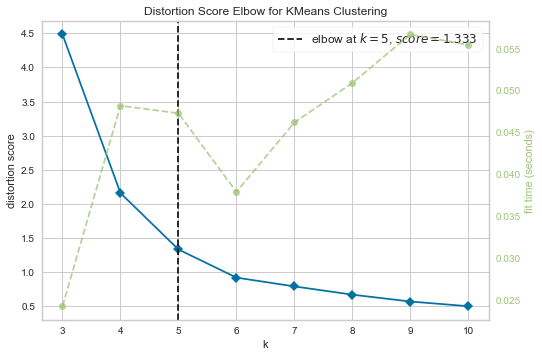

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
mx_restaurant_clustering = mc_borough_restaurants_filtered[['lat','lng']]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(mx_restaurant_clustering)
visualizer.poof()

In [22]:
# Set number of clusters at elbow point
kclusters = 5

# run K-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(mx_restaurant_clustering)

kmeans.fit(mx_restaurant_clustering)
predict = kmeans.predict(mx_restaurant_clustering)

mc_borough_restaurants_filtered['Cluster'] = predict

<b> Map clusters to Map of Mexico </b>

In [23]:
map_Mexico_City_clusters = folium.Map(location=[mxlatitude, mxlongitude], zoom_start=10)
colors = ['red', 'blue', 'green', 'purple', 'orange']
# add markers to map
for lat, lng, label, cluster in zip(
    mc_borough_restaurants_filtered['lat'], 
    mc_borough_restaurants_filtered['lng'], 
    mc_borough_restaurants_filtered['name'],
    mc_borough_restaurants_filtered['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Mexico_City_clusters)  
    
map_Mexico_City_clusters

<b> At this point, I notice that several points are very far away. This must be an error with Foursquare's server. I need to identify the outliers' cluster and remover them</b>

In [46]:
#backupdf = mc_borough_restaurants_filtered.copy()
#mc_borough_restaurants_filtered = backupdf.copy()
mc_borough_restaurants_filtered['Cluster'] =mc_borough_restaurants_filtered['Cluster'].astype(str)

In [47]:
# Count results to see which clusters are outliers
mc_borough_restaurants_filtered['Cluster'].value_counts()

0    145
4    119
3     83
2      4
1      3
Name: Cluster, dtype: int64

In [48]:
# Remove the outlying clusters
mc_borough_restaurants_filtered.drop(mc_borough_restaurants_filtered.index[mc_borough_restaurants_filtered['Cluster'] == '1'], inplace = True)
mc_borough_restaurants_filtered.drop(mc_borough_restaurants_filtered.index[mc_borough_restaurants_filtered['Cluster'] == '2'], inplace = True)
mc_borough_restaurants_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,crossStreet,neighborhood,id,Cluster
4,restaurant tamaulipeco,Mexican Restaurant,NaN,19.479555,-99.199989,"[{'label': 'display', 'lat': 19.47955503010384...",1700,MX,México,NaN,NaN,NaN,NaN,NaN,NaN,5061de84498ee603149cfd71,0
5,Restaurant Árabe Miguel,Restaurant,Cordoba 226,19.412743,-99.157052,"[{'label': 'display', 'lat': 19.41274283487654...",8413,MX,México,"[Cordoba 226 (Roma), 06700 Cuauhtémoc, Distrit...",06700,Cuauhtemoc,Distrito Federal,Roma,Roma Norte,4bdc88a7c79cc928f2ff86e9,0
6,Restaurant Montserrat,Mexican Restaurant,Río Papaloapan #5,19.429818,-99.164530,"[{'label': 'display', 'lat': 19.42981842558789...",6359,MX,México,"[Río Papaloapan #5 (Río Rhin), Ciudad de Méxic...",NaN,Ciudad de México,Distrito Federal,Río Rhin,NaN,4e5803ace4cd6acbd76452a6,0
7,Restaurant,Mexican Restaurant,guanabana,19.465265,-99.168290,"[{'label': 'display', 'lat': 19.465265, 'lng':...",2667,MX,México,"[guanabana (clavelinas), Ciudad de México, Dis...",NaN,Ciudad de México,Distrito Federal,clavelinas,NaN,585c4e193e88355679326a28,0
8,Restaurante Lupita,Mexican Restaurant,Hacienda del Rosario 199,19.502228,-99.210619,"[{'label': 'display', 'lat': 19.5022275720484,...",3431,MX,México,"[Hacienda del Rosario 199, Azcapotzalco, Distr...",NaN,Azcapotzalco,Distrito Federal,NaN,NaN,4e9f04d95c5c9252b664c6ff,0


In [49]:
mc_borough_restaurants_filtered.shape

(328, 17)

<b> Repeat the above analysis now outliers have been removed </b>

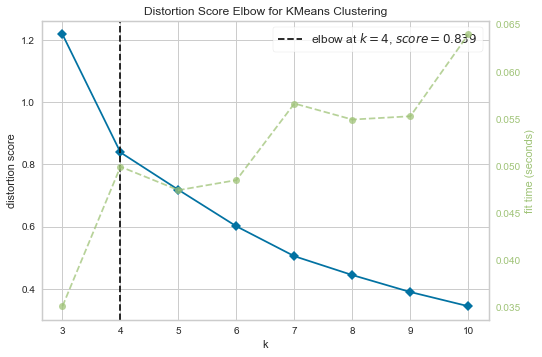

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Repeat KMeans Analysis:
mx_restaurant_clustering = mc_borough_restaurants_filtered[['lat','lng']]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(mx_restaurant_clustering)
visualizer.poof()

In [51]:
kclusters = 4

# run K-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(mx_restaurant_clustering)

kmeans.fit(mx_restaurant_clustering)
predict = kmeans.predict(mx_restaurant_clustering)

In [52]:
mc_borough_restaurants_filtered['NewCluster'] = pd.Series(predict, index=mc_borough_restaurants_filtered.index)

In [53]:
mc_borough_restaurants_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,crossStreet,neighborhood,id,Cluster,NewCluster
4,restaurant tamaulipeco,Mexican Restaurant,NaN,19.479555,-99.199989,"[{'label': 'display', 'lat': 19.47955503010384...",1700,MX,México,NaN,NaN,NaN,NaN,NaN,NaN,5061de84498ee603149cfd71,0,2
5,Restaurant Árabe Miguel,Restaurant,Cordoba 226,19.412743,-99.157052,"[{'label': 'display', 'lat': 19.41274283487654...",8413,MX,México,"[Cordoba 226 (Roma), 06700 Cuauhtémoc, Distrit...",06700,Cuauhtemoc,Distrito Federal,Roma,Roma Norte,4bdc88a7c79cc928f2ff86e9,0,2
6,Restaurant Montserrat,Mexican Restaurant,Río Papaloapan #5,19.429818,-99.164530,"[{'label': 'display', 'lat': 19.42981842558789...",6359,MX,México,"[Río Papaloapan #5 (Río Rhin), Ciudad de Méxic...",NaN,Ciudad de México,Distrito Federal,Río Rhin,NaN,4e5803ace4cd6acbd76452a6,0,2
7,Restaurant,Mexican Restaurant,guanabana,19.465265,-99.168290,"[{'label': 'display', 'lat': 19.465265, 'lng':...",2667,MX,México,"[guanabana (clavelinas), Ciudad de México, Dis...",NaN,Ciudad de México,Distrito Federal,clavelinas,NaN,585c4e193e88355679326a28,0,2
8,Restaurante Lupita,Mexican Restaurant,Hacienda del Rosario 199,19.502228,-99.210619,"[{'label': 'display', 'lat': 19.5022275720484,...",3431,MX,México,"[Hacienda del Rosario 199, Azcapotzalco, Distr...",NaN,Azcapotzalco,Distrito Federal,NaN,NaN,4e9f04d95c5c9252b664c6ff,0,2


<b> Remap the city with new clusters </b>

In [54]:
map_Mexico_City_clusters = folium.Map(location=[mxlatitude, mxlongitude], zoom_start=10)
colors = ['red', 'blue', 'green', 'purple', 'orange']
# add markers to map
for lat, lng, label, cluster in zip(
    mc_borough_restaurants_filtered['lat'], 
    mc_borough_restaurants_filtered['lng'], 
    mc_borough_restaurants_filtered['name'],
    mc_borough_restaurants_filtered['NewCluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Mexico_City_clusters)  
    
map_Mexico_City_clusters

<h1> Analysis</h1>
Now I have grouped the restaurants, I will see if there is any interesting location to put a restaurant

In [55]:
cluster1 = mc_borough_restaurants_filtered.loc[mc_borough_restaurants_filtered['NewCluster'] == 0]
cluster2 = mc_borough_restaurants_filtered.loc[mc_borough_restaurants_filtered['NewCluster'] == 1]
cluster3 = mc_borough_restaurants_filtered.loc[mc_borough_restaurants_filtered['NewCluster'] == 2]
cluster4 = mc_borough_restaurants_filtered.loc[mc_borough_restaurants_filtered['NewCluster'] == 3]

In [56]:
restaurant_types_cluster1 = cluster1.groupby('categories').size().reset_index(name='Counts')
restaurant_types_cluster1.sort_values(by=['Counts'], ascending=False).head(10)

,categories,Counts
10,Mexican Restaurant,35
12,Restaurant,20
13,Seafood Restaurant,5
0,American Restaurant,1
9,Latin American Restaurant,1
15,Steakhouse,1
14,Spanish Restaurant,1
11,New American Restaurant,1
8,Gluten-free Restaurant,1
1,Argentinian Restaurant,1


In [57]:
restaurant_types_cluster2 = cluster2.groupby('categories').size().reset_index(name='Counts')
restaurant_types_cluster2.sort_values(by=['Counts'], ascending=False).head(10)

,categories,Counts
20,Restaurant,28
16,Mexican Restaurant,17
9,Chinese Restaurant,4
3,Bar,3
4,Bistro,3
5,Breakfast Spot,3
1,Argentinian Restaurant,3
12,Fondue Restaurant,2
10,Comfort Food Restaurant,2
18,Pakistani Restaurant,1


In [58]:
restaurant_types_cluster3 = cluster3.groupby('categories').size().reset_index(name='Counts')
restaurant_types_cluster3.sort_values(by=['Counts'], ascending=False).head(10)

,categories,Counts
20,Mexican Restaurant,42
22,Restaurant,36
4,Bar,5
9,Chinese Restaurant,5
12,Diner,4
10,Comfort Food Restaurant,2
16,Gastropub,2
1,American Restaurant,2
14,Food,2
23,Seafood Restaurant,2


In [59]:
restaurant_types_cluster4 = cluster4.groupby('categories').size().reset_index(name='Counts')
restaurant_types_cluster4.sort_values(by=['Counts'], ascending=False).head(10)

,categories,Counts
8,Restaurant,13
7,Mexican Restaurant,12
0,American Restaurant,3
1,Argentinian Restaurant,1
2,Chinese Restaurant,1
3,Food,1
4,Gastropub,1
5,Japanese Restaurant,1
6,Latin American Restaurant,1
9,Seafood Restaurant,1


<b> All boroughs are roughly the same. This is due to Foursquare's limited results for Mexico City. Instead, I suggest we should place the restaurant in the borough with the highest number of restaurants on Foursquare: while this may seem counter-intuitive, only the biggest and most popular restaurants will be listed on Foursquare, and where they are placed will be indicative of success. I suggest putting the restaurant in the borough closest to the centroid of the group with the highest number of restaurants.

In [61]:
mc_borough_restaurants_filtered['NewCluster'].value_counts()


2    131
1     85
0     74
3     38
Name: NewCluster, dtype: int64

In [62]:
# Find the centroids of the clusters
kmeans.cluster_centers_


array([[ 19.25173116, -99.04300284],
       [ 19.33063509, -99.15755182],
       [ 19.44016526, -99.1532429 ],
       [ 19.35117219, -99.28269758]])

In [63]:
# Create an iterable list of boroughs with their latitudes and longitudes

mx_boroughs_lat_lng = []

for borough, lat, lng in zip(mexico_City_boroughs['Name'], mexico_City_boroughs['Latitude'], mexico_City_boroughs['Longitude']):
    mx_boroughs_lat_lng.append([borough, lat, lng])

mx_boroughs_lat_lng

[['Álvaro Obregón[a]', 19.8168516, -101.0114388],
 ['Azcapotzalco', 19.4837824, -99.1844166],
 ['Benito Juárez', 20.8169666, -98.17826806649418],
 ['Coyoacán', 19.3500942, -99.1623319],
 ['Cuajimalpa', 19.3570477, -99.3006776],
 ['Cuauhtémoc', 22.460514, -102.35347648077007],
 ['Gustavo A. Madero[b]', 19.4838614, -99.1134723],
 ['Iztacalco[c]', 19.3962535, -99.0965875],
 ['Iztapalapa', 19.3591195, -99.0929294],
 ['La Magdalena Contreras', 19.3049539, -99.241301],
 ['Miguel Hidalgo', 19.4075059, -99.1917103],
 ['Milpa Alta', 19.1919839, -99.0228937],
 ['Tláhuac[d]', 19.2703721, -99.0049033],
 ['Tlalpan[e]', 19.2884203, -99.1670508],
 ['Venustiano Carranza', 19.4192316, -99.1133947],
 ['Xochimilco', 19.2634938, -99.1033663]]

In [65]:
# Create a function that will compare the distance of a particular new point (the centoid of the largest cluster)
# to the centroids of the boroughs, and return the name of the nearest borough

def closest(points, new_point):
    closest_point = None
    closest_distance = None
    borough = None
    for point in points:
        distance = ((point[1] - new_point[0])**2 + (point[2] - new_point[1])**2)**0.5
        if closest_distance is None or distance < closest_distance:
            closest_point = point
            closest_distance = distance
    return print(f"The borough you should build your restaurant in is {closest_point[0]}")

closest(mx_boroughs_lat_lng, [ 19.44016526, -99.1532429 ])

The borough you should build your restaurant in is Venustiano Carranza


<h2> Conclusion </h2>
The restaurant should be set up in Venustiano Carranza. This is a sensible location, in the center of the city, with a relatively high population.